<h1>13 Measuring Text Similarities

In [1]:
text1 = 'She sells seashells by the seashore.'
text2 = '"Seashells! The seashells are on sale! By the seashore."'
text3 = 'She sells 3 seashells to John, who lives by the lake.'
words_lists = [text.split() for text in [text1, text2, text3]]
words1, words2, words3 = words_lists

for i, words in enumerate(words_lists, 1):
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['She', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 2
['"Seashells!', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 3
['She', 'sells', '3', 'seashells', 'to', 'John,', 'who', 'lives', 'by', 'the', 'lake.']



In [2]:
def simplify_text(text):
    for punctuation in ['.', ',', '!', '?', '"']:
        text = text.replace(punctuation, '')

    return text.lower()

for i, words in enumerate(words_lists, 1):
    for j, word in enumerate(words):
        words[j] = simplify_text(word)

    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale', 'by', 'the', 'seashore']

Words in text 3
['she', 'sells', '3', 'seashells', 'to', 'john', 'who', 'lives', 'by', 'the', 'lake']



In [3]:
words_sets = [set(words) for words in words_lists]
for i, unique_words in enumerate(words_sets, 1):
    print(f"Unique Words in text {i}")
    print(f"{unique_words}\n")

Unique Words in text 1
{'seashore', 'seashells', 'sells', 'she', 'by', 'the'}

Unique Words in text 2
{'are', 'seashore', 'seashells', 'on', 'the', 'sale', 'by'}

Unique Words in text 3
{'3', 'lives', 'seashells', 'sells', 'she', 'to', 'who', 'lake', 'by', 'the', 'john'}



In [4]:
words_sets

[{'by', 'seashells', 'seashore', 'sells', 'she', 'the'},
 {'are', 'by', 'on', 'sale', 'seashells', 'seashore', 'the'},
 {'3',
  'by',
  'john',
  'lake',
  'lives',
  'seashells',
  'sells',
  'she',
  'the',
  'to',
  'who'}]

In [5]:
words_set1 = words_sets[0]
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    print(f"Texts 1 and {i} share these {len(shared_words)} words:")
    print(f"{shared_words}\n")

Texts 1 and 2 share these 4 words:
{'seashore', 'by', 'seashells', 'the'}

Texts 1 and 3 share these 5 words:
{'seashells', 'sells', 'she', 'by', 'the'}



In [6]:
for i, words_set in enumerate(words_sets[1:], 2):
    diverging_words = words_set1 ^ words_set
    print(f"Texts 1 and {i} don't share these {len(diverging_words)} words:")
    print(f"{diverging_words}\n")

Texts 1 and 2 don't share these 5 words:
{'are', 'she', 'sale', 'sells', 'on'}

Texts 1 and 3 don't share these 7 words:
{'3', 'seashore', 'lives', 'to', 'who', 'lake', 'john'}



In [7]:
for i, words_set in enumerate(words_sets[1:], 2):
    total_words = words_set1 | words_set
    print(f"Together, texts 1 and {i} contain {len(total_words)} "
          f"unique words. These words are:\n {total_words}\n")

Together, texts 1 and 2 contain 9 unique words. These words are:
 {'are', 'seashore', 'seashells', 'sells', 'she', 'on', 'by', 'the', 'sale'}

Together, texts 1 and 3 contain 12 unique words. These words are:
 {'seashore', 'seashells', 'to', 'who', 'lake', 'by', 'john', '3', 'lives', 'sells', 'she', 'the'}



In [8]:
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    diverging_words = words_set1 ^ words_set
    total_words = words_set1 | words_set
    assert len(total_words) == len(shared_words) + len(diverging_words)
    percent_shared = 100 * len(shared_words) / len(total_words)
    percent_diverging = 100 * len(diverging_words) / len(total_words)

    print(f"Together, texts 1 and {i} contain {len(total_words)} "
          f"unique words. \n{percent_shared:.2f}% of these words are "
          f"shared. \n{percent_diverging:.2f}% of these words diverge.\n")

Together, texts 1 and 2 contain 9 unique words. 
44.44% of these words are shared. 
55.56% of these words diverge.

Together, texts 1 and 3 contain 12 unique words. 
41.67% of these words are shared. 
58.33% of these words diverge.



In [9]:
def jaccard_similarity(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split())
                              for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a | word_set_b)
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity(text1, text)
    print(f"The Jaccard similarity between '{text1}' and '{text}' "
          f"equals {similarity:.4f}." "\n")

The Jaccard similarity between 'She sells seashells by the seashore.' and '"Seashells! The seashells are on sale! By the seashore."' equals 0.4444.

The Jaccard similarity between 'She sells seashells by the seashore.' and 'She sells 3 seashells to John, who lives by the lake.' equals 0.4167.



In [10]:
def jaccard_similarity_efficient(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split())
                              for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a) + len(word_set_b) - num_shared
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity_efficient(text1, text)
    assert similarity == jaccard_similarity(text1, text)

In [11]:
words_set1, words_set2, words_set3 = words_sets
total_words = words_set1 | words_set2 | words_set3
vocabulary = {word : i for i, word in enumerate(total_words)}
value_to_word = {value: word for word, value in vocabulary.items()}
print(f"Our vocabulary contains {len(vocabulary)} words. "
      f"This vocabulary is:\n{vocabulary}")

Our vocabulary contains 15 words. This vocabulary is:
{'seashore': 0, 'seashells': 1, 'on': 2, 'to': 3, 'who': 4, 'lake': 5, 'by': 6, 'john': 7, 'are': 8, '3': 9, 'lives': 10, 'sells': 11, 'she': 12, 'the': 13, 'sale': 14}


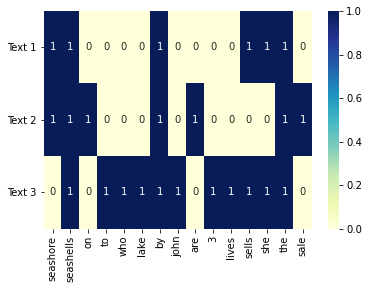

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

vectors = []
for i, words_set in enumerate(words_sets, 1):
    vector = np.array([0] * len(vocabulary))
    for word in words_set:
        vector[vocabulary[word]] = 1
    vectors.append(vector)

sns.heatmap(vectors, annot=True,  cmap='YlGnBu',
            xticklabels=vocabulary.keys(),
yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

In [13]:
vector1, vector2 = vectors[:2]
for i in range(len(vocabulary)):
    if vector1[i] * vector2[i]:
        shared_word = value_to_word[i]
        print(f"'{shared_word}' is present in both texts 1 and 2")

'seashore' is present in both texts 1 and 2
'seashells' is present in both texts 1 and 2
'by' is present in both texts 1 and 2
'the' is present in both texts 1 and 2


In [14]:
def tanimoto_similarity(vector_a, vector_b):
    num_shared = vector_a @ vector_b
    num_total = vector_a @ vector_a + vector_b @ vector_b - num_shared
    return num_shared / num_total

for i, text in enumerate([text2, text3], 1):
    similarity = tanimoto_similarity(vector1, vectors[i])
    assert similarity == jaccard_similarity(text1, text)

In [15]:
non_binary_vector1 = np.array([5, 3])
non_binary_vector2 = np.array([5, 2])
similarity = tanimoto_similarity(non_binary_vector1, non_binary_vector2)
print(f"The similarity of 2 non-binary vectors is {similarity}")

The similarity of 2 non-binary vectors is 0.96875


<h2>13.2  Vectorizing Texts Using Word Counts

In [16]:
similarity = tanimoto_similarity(np.array([61, 2]), np.array([1, 71]))
print(f"The similarity between texts is approximately {similarity:.3f}")

The similarity between texts is approximately 0.024


In [19]:
assert tanimoto_similarity(np.array([1, 1]), np.array([1, 1])) == 1

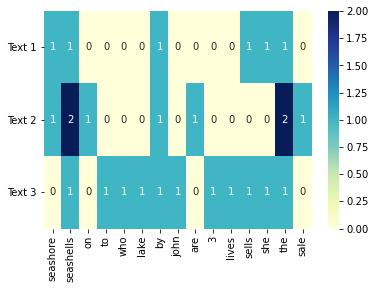

In [20]:
tf_vectors = []
for i, words_list in enumerate(words_lists, 1):
    tf_vector = np.array([0] * len(vocabulary))
    for word in words_list:
        word_index = vocabulary[word]
        # Update the count of each word using its vocabulary index.
        tf_vector[word_index] += 1

    tf_vectors.append(tf_vector)


sns.heatmap(tf_vectors,  cmap='YlGnBu', annot=True,
            xticklabels=vocabulary.keys(),
yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

In [21]:
tf_vector1 = tf_vectors[0]
binary_vector1 = vectors[0]

for i, tf_vector in enumerate(tf_vectors[1:], 2):
    similarity = tanimoto_similarity(tf_vector1, tf_vector)
    old_similarity = tanimoto_similarity(binary_vector1, vectors[i - 1])
    print(f"The recomputed Tanimoto similarity between texts 1 and {i} is"
          f" {similarity:.4f}.")
    print(f"Previously, that similarity equaled {old_similarity:.4f} " "\n")

The recomputed Tanimoto similarity between texts 1 and 2 is 0.4615.
Previously, that similarity equaled 0.4444 

The recomputed Tanimoto similarity between texts 1 and 3 is 0.4167.
Previously, that similarity equaled 0.4167 



In [22]:
query_vector = np.array([1, 1])
title_a_vector = np.array([3, 3])
title_b_vector = np.array([1, 0])

In [23]:
titles = ["A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!",
          "B: Pepperoni"]
title_vectors = [title_a_vector, title_b_vector]
similarities = [tanimoto_similarity(query_vector, title_vector)
                for title_vector in title_vectors]

for index in sorted(range(len(titles)), key=lambda i: similarities[i],
                    reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}' has a query similarity of {similarity:.4f}")

'B: Pepperoni' has a query similarity of 0.5000
'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a query similarity of 0.4286


In [24]:
assert np.array_equal(query_vector, title_a_vector / 3)
assert tanimoto_similarity(query_vector,
                           title_a_vector / 3) == 1

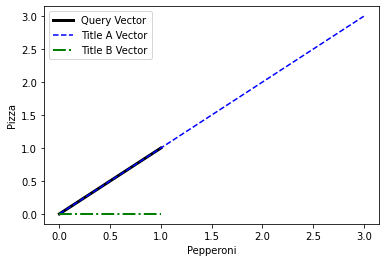

In [25]:
plt.plot([0, query_vector[0]], [0, query_vector[1]], c='k',
         linewidth=3, label='Query Vector')
plt.plot([0, title_a_vector[0]], [0, title_a_vector[1]], c='b',
          linestyle='--', label='Title A Vector')
plt.plot([0, title_b_vector[0]], [0, title_b_vector[1]], c='g',
         linewidth=2, linestyle='-.', label='Title B Vector')
plt.xlabel('Pepperoni')
plt.ylabel('Pizza')
plt.legend()
plt.show()

In [26]:
from scipy.spatial.distance import euclidean
from numpy.linalg import norm

vector_names = ['Query Vector', 'Title A Vector', 'Title B Vector']
tf_search_vectors = [query_vector, title_a_vector, title_b_vector]
origin = np.array([0, 0])
for name, tf_vector in zip(vector_names, tf_search_vectors):
    magnitude = euclidean(tf_vector, origin)
    assert magnitude == norm(tf_vector)
    assert magnitude == (tf_vector @ tf_vector) ** 0.5
    print(f"{name}'s magnitude is approximately {magnitude:.4f}")

magnitude_ratio = norm(title_a_vector) / norm(query_vector)
print(f"\nVector A is {magnitude_ratio:.0f}x as long as Query Vector")

Query Vector's magnitude is approximately 1.4142
Title A Vector's magnitude is approximately 4.2426
Title B Vector's magnitude is approximately 1.0000

Vector A is 3x as long as Query Vector


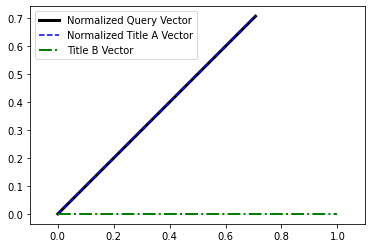

In [27]:
unit_query_vector = query_vector / norm(query_vector)
unit_title_a_vector = title_a_vector / norm(title_a_vector)
np.array_equal(unit_query_vector, unit_title_a_vector)
unit_title_b_vector = title_b_vector

plt.plot([0, unit_query_vector[0]], [0, unit_query_vector[1]], c='k',
         linewidth=3, label='Normalized Query Vector')
plt.plot([0, unit_title_a_vector[0]], [0, unit_title_a_vector[1]], c='b',
          linestyle='--', label='Normalized Title A Vector')
plt.plot([0, unit_title_b_vector[0]], [0, unit_title_b_vector[1]], c='g',
         linewidth=2, linestyle='-.', label='Title B Vector')

plt.axis('equal')
plt.legend()
plt.show()

In [28]:
unit_title_vectors = [unit_title_a_vector, unit_title_b_vector]
similarities = [tanimoto_similarity(unit_query_vector, unit_title_vector)
                for unit_title_vector in unit_title_vectors]

for index in sorted(range(len(titles)), key=lambda i: similarities[i],
                    reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}' has a normalized query similarity of {similarity:.4f}")

'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!' has a normalized query similarity of 1.0000
'B: Pepperoni' has a normalized query similarity of 0.5469


In [29]:
def normalized_tanimoto(u1, u2):
    dot_product = u1 @ u2
    return dot_product / (2 - dot_product)

for unit_title_vector in unit_title_vectors[1:]:
    similarity = normalized_tanimoto(unit_query_vector, unit_title_vector)
    assert similarity == tanimoto_similarity(unit_query_vector,
                                             unit_title_vector)

In [30]:
unit_vector_names = ['Normalized Title A vector', 'Title B Vector']
u1 = unit_query_vector

for unit_vector_name, u2 in zip(unit_vector_names, unit_title_vectors):
    similarity = normalized_tanimoto(u1, u2)
    cosine_similarity  = 2 * similarity / (1 + similarity)
    assert cosine_similarity == u1 @ u2
    angle = np.arccos(cosine_similarity)
    euclidean_distance = (2 - 2 * cosine_similarity) ** 0.5
    assert round(euclidean_distance, 10) == round(euclidean(u1, u2), 10)
    measurements = {'Tanimoto similarity': similarity,
                    'cosine similarity': cosine_similarity,
                    'Euclidean distance': euclidean_distance,
                    'angle': np.degrees(angle)}

    print("We are comparing Normalized Query Vector and "
           f"{unit_vector_name}")
    for measurement_type, value in measurements.items():
        output = f"The {measurement_type} between vectors is {value:.4f}"
        if measurement_type == 'angle':
            output += ' degrees\n'

        print(output)

We are comparing Normalized Query Vector and Normalized Title A vector
The Tanimoto similarity between vectors is 1.0000
The cosine similarity between vectors is 1.0000
The Euclidean distance between vectors is 0.0000
The angle between vectors is 0.0000 degrees

We are comparing Normalized Query Vector and Title B Vector
The Tanimoto similarity between vectors is 0.5469
The cosine similarity between vectors is 0.7071
The Euclidean distance between vectors is 0.7654
The angle between vectors is 45.0000 degrees



<h2>13.3  Matrix Multiplication for Efficient Similarity Calculation

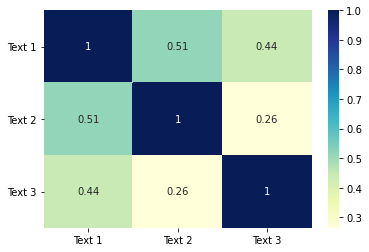

In [31]:
num_texts = len(tf_vectors)
similarities = np.array([[0.0] * num_texts for _ in range(num_texts)])
similarities = np.zeros((num_texts, num_texts))
unit_vectors = np.array([vector / norm(vector) for vector in tf_vectors])
for i, vector_a in enumerate(unit_vectors):
    for j, vector_b in enumerate(unit_vectors):
        similarities[i][j] = normalized_tanimoto(vector_a, vector_b)

labels = ['Text 1', 'Text 2', 'Text 3']
sns.heatmap(similarities,  cmap='YlGnBu', annot=True,
            xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=0)
plt.show()

In [33]:
import pandas as pd

matrices = [unit_vectors, pd.DataFrame(unit_vectors)]
matrix_types = ['Pandas DataFrame', '2D NumPy array']

for matrix_type, matrix in zip(matrix_types, matrices):
    row_count, column_count = matrix.shape
    print(f"Our {matrix_type} contains "
          f"{row_count} rows and {column_count} columns")
    assert (column_count, row_count) == matrix.T.shape

Our Pandas DataFrame contains 3 rows and 15 columns
Our 2D NumPy array contains 3 rows and 15 columns


In [34]:
double_similarites = 2 * similarities
np.array_equal(double_similarites, similarities + similarities)
zero_matrix = similarities - similarities
negative_1_matrix = similarities - similarities - 1

for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        assert double_similarites[i][j] == 2 * similarities[i][j]
        assert zero_matrix[i][j] == 0
        assert negative_1_matrix[i][j] == -1

In [35]:
squared_similarities = similarities * similarities
assert np.array_equal(squared_similarities, similarities ** 2)
ones_matrix = similarities / similarities

for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        assert squared_similarities[i][j] == similarities[i][j] ** 2
        assert ones_matrix[i][j] == 1

In [36]:
cosine_similarities  = 2 * similarities / (1 + similarities)
for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        cosine_sim = unit_vectors[i] @ unit_vectors[j]
        assert round(cosine_similarities[i][j],
                     15) == round(cosine_sim, 15)

In [37]:
for name, matrix in [('Similarities', similarities),
                     ('Unit Vectors', unit_vectors)]:
    print(f"Accessing rows and columns in the {name} Matrix.")
    row, column = matrix[1], matrix[:,1]
    print(f"Row at index 0 is:\n{row}")
    print(f"\nColumn at index 0 is:\n{column}\n")

Accessing rows and columns in the Similarities Matrix.
Row at index 0 is:
[0.51442439 1.         0.26431921]

Column at index 0 is:
[0.51442439 1.         0.26431921]

Accessing rows and columns in the Unit Vectors Matrix.
Row at index 0 is:
[0.2773501 0.5547002 0.2773501 0.        0.        0.        0.2773501
 0.        0.2773501 0.        0.        0.        0.        0.5547002
 0.2773501]

Column at index 0 is:
[0.40824829 0.5547002  0.30151134]



In [38]:
row = similarities[0]
column = unit_vectors[:,0]
dot_product = row @ column
print(f"The dot product between the row and column is: {dot_product:.4f}")

The dot product between the row and column is: 0.5509


In [39]:
num_rows = similarities.shape[0]
num_columns = unit_vectors.shape[1]
for i in range(num_rows):
    for j in range(num_columns):
        row = similarities[i]
        column = unit_vectors[:,j]
        dot_product = row @ column
        print(f"The dot product between row {i} column {j} is: "
              f"{dot_product:.4f}")

The dot product between row 0 column 0 is: 0.5509
The dot product between row 0 column 1 is: 0.8276
The dot product between row 0 column 2 is: 0.1427
The dot product between row 0 column 3 is: 0.1340
The dot product between row 0 column 4 is: 0.1340
The dot product between row 0 column 5 is: 0.1340
The dot product between row 0 column 6 is: 0.6850
The dot product between row 0 column 7 is: 0.1340
The dot product between row 0 column 8 is: 0.1427
The dot product between row 0 column 9 is: 0.1340
The dot product between row 0 column 10 is: 0.1340
The dot product between row 0 column 11 is: 0.5423
The dot product between row 0 column 12 is: 0.5423
The dot product between row 0 column 13 is: 0.8276
The dot product between row 0 column 14 is: 0.1427
The dot product between row 1 column 0 is: 0.4874
The dot product between row 1 column 1 is: 0.8444
The dot product between row 1 column 2 is: 0.2774
The dot product between row 1 column 3 is: 0.0797
The dot product between row 1 column 4 is: 0.

In [40]:
dot_products = np.zeros((num_rows, num_columns))
for i in range(num_rows):
    for j in range(num_columns):
        dot_products[i][j] = similarities[i] @ unit_vectors[:,j]

print(dot_products)

[[0.55092394 0.82762755 0.14267565 0.13402795 0.13402795 0.13402795
  0.6849519  0.13402795 0.14267565 0.13402795 0.13402795 0.54227624
  0.54227624 0.82762755 0.14267565]
 [0.48736297 0.84440831 0.2773501  0.07969524 0.07969524 0.07969524
  0.56705821 0.07969524 0.2773501  0.07969524 0.07969524 0.28970812
  0.28970812 0.84440831 0.2773501 ]
 [0.25478367 0.62960397 0.07330896 0.30151134 0.30151134 0.30151134
  0.55629501 0.30151134 0.07330896 0.30151134 0.30151134 0.48298605
  0.48298605 0.62960397 0.07330896]]


In [41]:
matrix_product = similarities @ unit_vectors
assert np.allclose(matrix_product, dot_products)

In [42]:
try:
    matrix_product = unit_vectors @ similarities
except:
    print("We can't compute the matrix product")

We can't compute the matrix product


In [43]:
matrix_product = np.matmul(similarities, unit_vectors)
assert np.array_equal(matrix_product,
                      similarities @ unit_vectors)

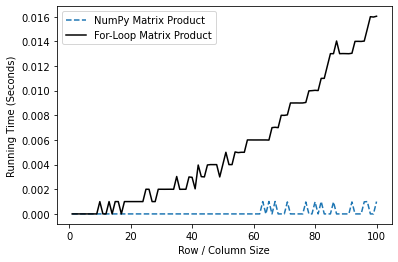

In [46]:
import time

numpy_run_times = []
for_loop_run_times = []

matrix_sizes = range(1, 101)
for size in matrix_sizes:
    matrix = np.ones((size, size))

    start_time = time.time()
    matrix @ matrix
    numpy_run_times.append(time.time() - start_time)

    start_time = time.time()
    for i in range(size):
        for j in range(size):
            matrix[i] @ matrix[:,j]

    for_loop_run_times.append(time.time() - start_time)

plt.plot(matrix_sizes, numpy_run_times,
         label='NumPy Matrix Product', linestyle='--')
plt.plot(matrix_sizes, for_loop_run_times,
         label='For-Loop Matrix Product', color='k')
plt.xlabel('Row / Column Size')
plt.ylabel('Running Time (Seconds)')
plt.legend()
plt.show()

In [47]:
cosine_matrix = unit_vectors @ unit_vectors.T
assert np.allclose(cosine_matrix, cosine_similarities)

In [48]:
tanimoto_matrix = cosine_matrix / (2 - cosine_matrix)
assert np.allclose(tanimoto_matrix, similarities)

In [49]:
output = normalized_tanimoto(unit_vectors, unit_vectors.T)
assert np.array_equal(output, tanimoto_matrix)

In [50]:
vocabulary_size = 50000
normalized_vector = [1 / vocabulary_size] * vocabulary_size
book_count = 30

def measure_run_time(book_count):
    book_matrix = np.array([normalized_vector] * book_count)
    start_time = time.time()
    normalized_tanimoto(book_matrix, book_matrix.T)
    return time.time() - start_time

run_time = measure_run_time(book_count)
print(f"It took {run_time:.4f} seconds to compute the similarities across a "
      f"{book_count}-book by {vocabulary_size}-word matrix")

It took 0.0070 seconds to compute the similarities across a 30-book by 50000-word matrix


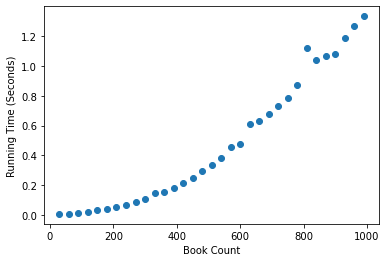

In [51]:
book_counts = range(30, 1000, 30)
run_times = [measure_run_time(book_count)
             for book_count in book_counts]
plt.scatter(book_counts, run_times)
plt.xlabel('Book Count')
plt.ylabel('Running Time (Seconds)')
plt.show()

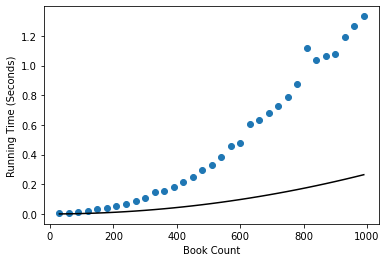

In [52]:
def y(x): return (0.27 / (1000 ** 2)) * (x ** 2)
plt.scatter(book_counts, run_times)
plt.plot(book_counts, y(np.array(book_counts)), c='k')
plt.xlabel('Book Count')
plt.ylabel('Running Time (Seconds)')
plt.show()

In [53]:
book_count = 300000
run_time = y(book_count) / 3600
print(f"It will take {run_time} hours to compute all-by-all similarities "
      f"from a {book_count}-book by {vocabulary_size}-word matrix")

It will take 6.75 hours to compute all-by-all similarities from a 300000-book by 50000-word matrix


<h1>14 Dimension Reduction of Matrix Data